<h1 style="font-size: 1.6rem; font-weight: bold">ITO 5047: Fundamentals of Artificial Intelligence</h1>
<h1 style="font-size: 1.6rem; font-weight: bold">Tutorial 3 - Bayesian Networks</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>

---

### **1. Bayesian Reasoning**
Consider the following Bayesian network for another version of the medical diagnosis example, where B=Bronchitis, S=Smoker, C=Cough, X=Positive X-ray, and L=Lung cancer, and all nodes are Boolean. Suppose that the prior for a patient being a smoker is 0.25, and the prior for the patient having bronchitis is 0.05. List the pairs of nodes that are conditionally independent in the following situations and explain why.

*Image and Questions Courtesy of Monash University*

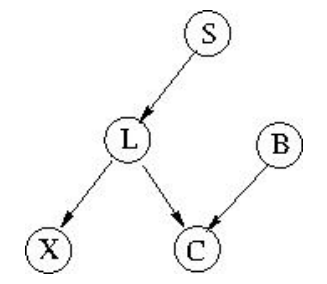

Two nodes are conditionally independent given evidence when all paths between them are blocked. Paths are blocked by:
- Chain blocking: A→B→C - if B is observed, A ⊥ C | B
- Common cause blocking: A←B→C - if B is observed, A ⊥ C | B
- Common effect (v-structure): A→B←C - if B is NOT observed, A ⊥ C (but if B IS observed, A and C become dependent)

a) There is no evidence for any of the nodes.

**L ⊥ B: L→C←B forms a v-structure. Since C is unobserved, L and B are independent**

**S ⊥ B: The path S→L→C←B - since C is unobserved, this path is blocked at the v-structure**

**X ⊥ B: The path X←L→C←B - since C is unobserved, this path is blocked at the v-structure**

<br>

b) The lung cancer node (L) is set to true (and there is no other evidence).

**S ⊥ X | L: Chain S→L←X is blocked by observing L**

**S ⊥ C | L: Chain S→L→C is blocked by observing L**

**S ⊥ B | L: Path S→L→C←B is blocked by observing L**

**X ⊥ C | L: X←L→C is blocked by observing L (common cause)**

**X ⊥ B | L: Path X←L→C←B is blocked by observing L**

<br>

c) The smoker node (S) is set to true (and there is no other evidence).

**L ⊥ B | S: Path L←S→B plus L→C←B. The direct path is blocked by S, and the v-structure at C (unobserved) blocks the second path**

**X ⊥ B | S: Path X←L←S→B is blocked by observing S, and X←L→C←B is blocked by the unobserved v-structure at C**

**Note: S is no longer a variable since it's evidence, so we don't consider independence involving S.**

<br>

d) The cough node (C) is set to true (and there is no other evidence).

**When C is observed, the v-structure L→C←B becomes active, meaning L and B are now dependent (explaining away effect). This creates dependencies that didn't exist before:**

**L and B are now dependent given C**

**This dependency propagates through the network**

**All other pairs that were previously independent now have active paths through the L-C-B connection**

<br>

---


### **2. Bayesian Network**

Consider a student who has the choice to buy or not buy a textbook for a course. We'll model this as a decision problem with one Boolean decision Node, *b*, indicating whether the student chooses to buy the book, and two Boolean chance nodes, *m*, indicating whether the student has mastered the material in the book, and *p*, indicating whether the student passes the course. Of course, there is also an additive utility node, *U*. A certain student, Sam, has a utility function: 0 for not buying the book and -$100 for buying it; and $2000 for passing the course and 0 for not passing. In this case, the additive utility for passing and buying the book is 2000 - 100.

Sam's conditional probability estimates are as follows:

$$Pr(p | b, m) = 0.9$$        
$$Pr(m | b) = 0.9$$
$$Pr(p | b, ¬m) = 0.5$$    
$$Pr(m | ¬b*) = 0.7$$
$$Pr(p | ¬b*, m) = 0.8$$
$$Pr(p | ¬b*, ¬m) = 0.3$$

You might think that *p* would be independent of *b* given *m*, but this course has an open-book final – so having the book helps.

a. Draw the decision network for this problem.

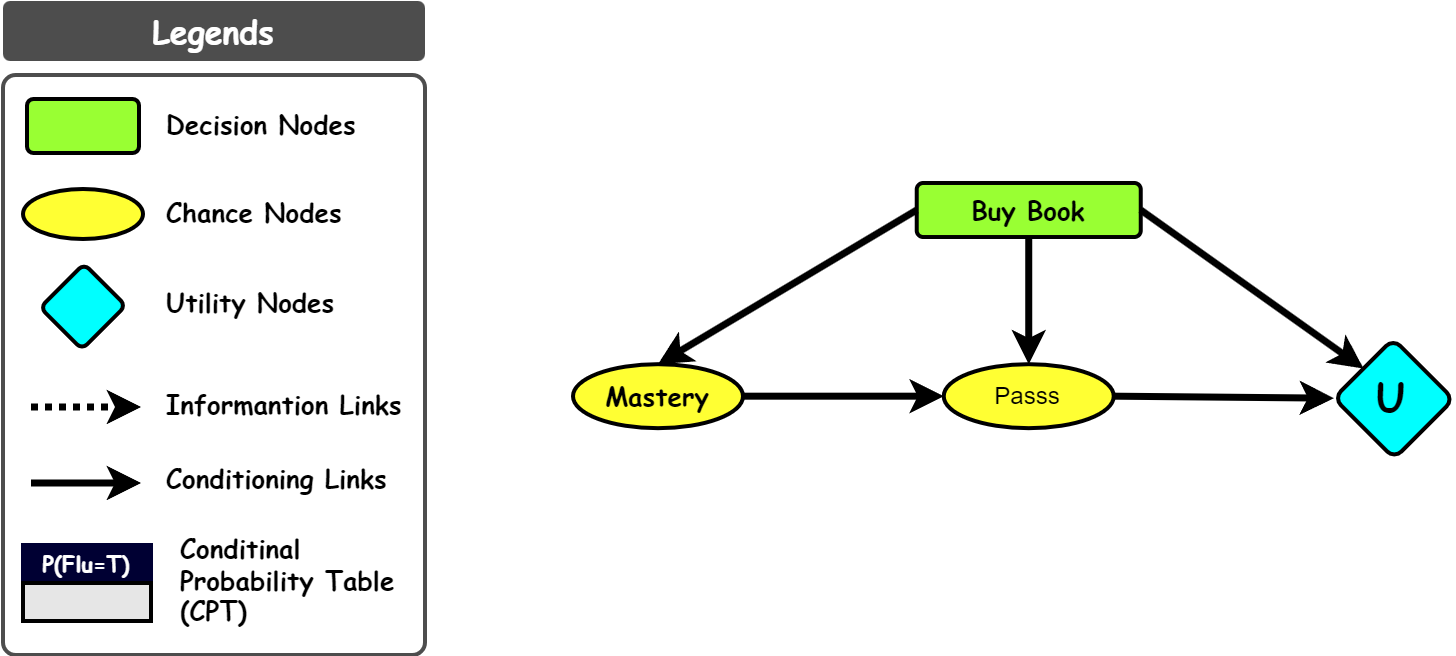

b. Compute the expected utility of buying the book and of not buying it.

**For each of B = b and B = ¬b, we compute Pr(p|B) and thus Pr(¬p|B) by marginalizing out M, then use this to compute the expected utility.**

$$Pr(p|b) = Σ Pr(p|b, m) × Pr(m|b)$$
$$= 0.9 × 0.9 + 0.5 × 0.1 = 0.86$$

$$Pr(p|¬b) = Σ Pr(p|¬b, m) × Pr(m|¬b)$$
$$= 0.8 × 0.7 + 0.3 × 0.3 = 0.65$$

**The expected utilities are thus:**

$$EU[b] = Σ Pr(p|b) × U(p, b)$$
$$= 0.86 × (2000 − 100) + 0.14 × (−100) = 1620$$

$$EU[¬b] = Σ Pr(p|¬b) × U(p, ¬b)$$
$$= 0.65 × 2000 + 0.35 × 0 = 1300$$

<br>

c. What should Sam do?

**Sam should buy te book**

---

### **3. D-separation**

According to this Figure, determine whether the following claims to be True or False and justify your answer.

*Image and Questions Courtesy of Monash University*

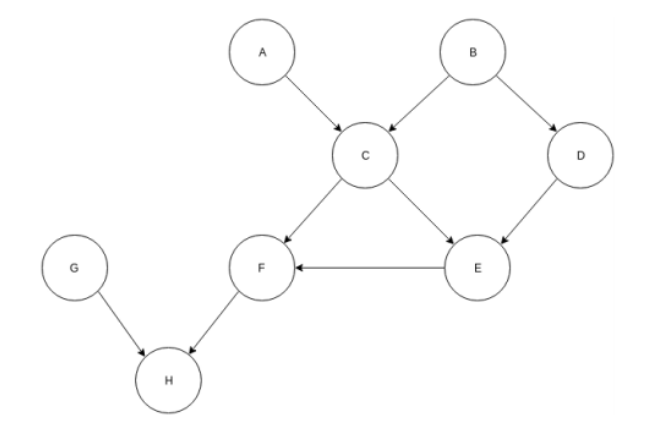

#### **a. B ⊥ G | A**

**Answer: True**

**SOLUTION: True, they are independent. Without knowing H (common effect), the information of B cannot propagate to G. It does not matter whether A is known.**

<br>

#### **b. C ⊥ D | F**

**Answer: FALSE**

**SOLUTION: False, they are not independent. Knowing F allows the information in C to propagate through E (common effect), then propagate to D (common effect).**

<br>

#### **c. C | D | A**

**Answer: FALSE**

**SOLUTION: False, they are not independent. Without knowing B (common cause), the information in C can propagate to D. Note that if there was evidence for E (common effect), information could propagate from C to D through E. However, in this situation we have no evidence for E, hence this path is blocked. Also note that it does not matter whether A is known.**

<br>

#### **d. H ⊥ B | C, F**

**Answer: TRUE**

**SOLUTION: True, they are independent. Knowing C and F (chain rule) blocks the information between H and B.**